In [122]:
# Chocolate!
# You are required to Explore the chocolate dataset, visualize the data and manipulate the features to fit your needs.

# Reading the Dataset
import pandas as pd

df = pd.read_csv("flavors_of_cacao.csv")

In [123]:
df.columns
# Renaming columns
df.columns = ['Company', 'SpecificBeanOrigin',
       'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating',
       'BeanType', 'BroadBeanOrigin']

In [124]:
# Previewing the data
df.head(20)

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


# Exploring the Dataset

In [125]:
# How many tuples are there in the dataset?
len(df)

1795

In [126]:
# How many unique company names are there in the dataset?
len(df.Company.unique())

416

In [127]:
# How many reviews are made in 2013 in the dataset?
# df.groupby(["ReviewDate"]).count()
len(df[df.ReviewDate == 2013])

184

In [128]:
# In the BeanType column, how many missing values are there?
len(df[df.BeanType == '\xa0'])

887

# Visualization

Text(0.5, 0, 'Ratings')

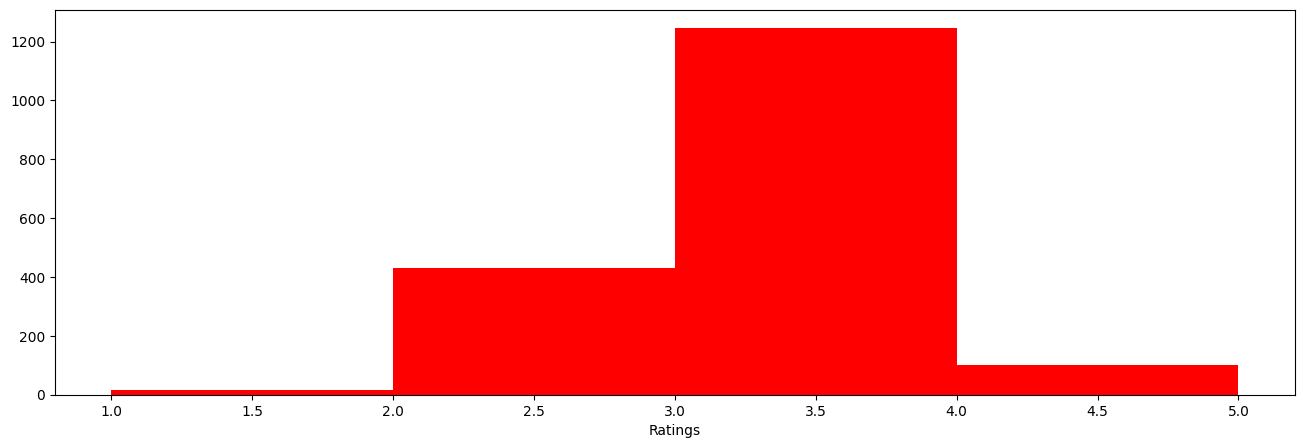

In [129]:
# Visualize the rating column with a histogram!
import matplotlib.pyplot as plt

ratings = df.Rating.values

plt.figure(figsize = (16, 5))
plt.hist(ratings, bins = 4, color = "red")
plt.xlabel("Ratings")

In [130]:
# Convert the Column Percent
# Change the type of values in the column percent from string values to numerical values.

    # The video in robogarden provided code to convert to int
    # However, there are decimal values in the dataset, so converting to int would throw and exception (and remove information via rounding if done)
    # I converted to float instead

# df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D', "").astype(int)
df["CocoaPercent"] = df["CocoaPercent"].str.replace('%',"").astype(float)
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


Text(0.5, 0, 'Cocoa Percent')

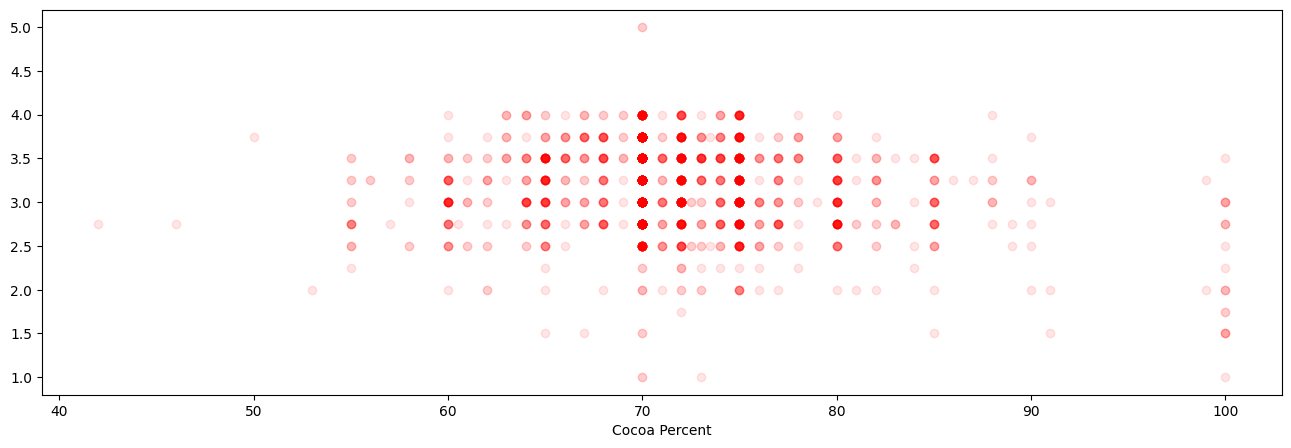

In [131]:
# Plot the converted numerical Cocoa Percent values against the Rating values!

ratings = df.Rating.values
percent = df.CocoaPercent.values

plt.figure(figsize = (16, 5))
plt.scatter(percent, ratings, color = "red", alpha = 0.1)
plt.xlabel("Cocoa Percent")

# From what you see, does more cocoa in a bar correspond to a higher rating?
# ANSWER: There is no distinct relationship

In [132]:
df.describe()

,REF,ReviewDate,CocoaPercent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [133]:
df.drop(df[df.CocoaPercent > 100].index, inplace = True)

# Normalization

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = df.iloc[:, 6:7].values
x_normalized = scaler.fit_transform(x)

# x[0:10]
x_normalized[0:10]

array([[ 1.18023096],
       [-0.91212912],
       [-0.3890391 ],
       [ 0.65714094],
       [ 0.65714094],
       [-0.91212912],
       [ 0.65714094],
       [ 0.65714094],
       [ 1.18023096],
       [ 1.70332098]])

# Challenge Yourself (Optional)
#### List the companies ordered by their average score (averaged over each company’s reviews).

In [141]:
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by = "mean", ascending = False)

,mean
Company,
Tobago Estate (Pralus),4.000000
Ocelot,3.875000
Heirloom Cacao Preservation (Zokoko),3.875000
Amedei,3.846154
Matale,3.812500
...,...
Love Bar,2.000000
Majani,2.000000
Machu Picchu Trading Co.,1.875000


# Encoding
#### Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

In [145]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[["Company", "CompanyLocation"]] = enc.fit_transform(df[["Company", "CompanyLocation"]])
df

,Company,SpecificBeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,0.0,Agua Grande,1876,2016,63.0,18.0,3.75,,Sao Tome
1,0.0,Kpime,1676,2015,70.0,18.0,2.75,,Togo
2,0.0,Atsane,1676,2015,70.0,18.0,3.00,,Togo
3,0.0,Akata,1680,2015,70.0,18.0,3.50,,Togo
4,0.0,Quilla,1704,2015,70.0,18.0,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,410.0,Peru,647,2011,70.0,3.0,3.75,,Peru
1791,410.0,Congo,749,2011,65.0,3.0,3.00,Forastero,Congo
1792,410.0,Kerala State,749,2011,65.0,3.0,3.50,Forastero,India
1793,410.0,Kerala State,781,2011,62.0,3.0,3.25,,India
